# November ??th, 2021

**Motivation**: butter bandpass, correlation in frequency domain, usage of plotting functions <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((512, 4))

In [3]:
mice.cfg.exclude_runs

[]

In [4]:
mice.setup_func_data()

sub-SLC08_ses-1_run-1  was excluded (BOLD)

sub-SLC10_ses-2_run-1  was excluded (BOLD)

sub-SLC10_ses-3_run-1  was excluded (CA)

sub-SLC10_ses-3_run-1  was excluded (BOLD)

sub-SLC10_ses-3_run-2  was excluded (CA)

sub-SLC10_ses-3_run-2  was excluded (BOLD)

sub-SLC10_ses-3_run-3  was excluded (CA)

sub-SLC10_ses-3_run-3  was excluded (BOLD)

sub-SLC10_ses-3_run-4  was excluded (CA)

sub-SLC10_ses-3_run-4  was excluded (BOLD)

sub-SLC10_ses-3_run-5  was excluded (CA)

sub-SLC10_ses-3_run-5  was excluded (BOLD)

sub-SLC10_ses-3_run-6  was excluded (CA)

sub-SLC10_ses-3_run-6  was excluded (BOLD)

sub-SLC10_ses-3_run-7  was excluded (CA)

sub-SLC10_ses-3_run-7  was excluded (BOLD)

In [5]:
list(mice.bold)

[
    'sub-SLC01_ses-1_run-1',
    'sub-SLC01_ses-1_run-3',
    'sub-SLC01_ses-1_run-5',
    'sub-SLC01_ses-1_run-7',
    'sub-SLC01_ses-2_run-1',
    'sub-SLC01_ses-2_run-3',
    'sub-SLC01_ses-2_run-5',
    'sub-SLC01_ses-2_run-7',
    'sub-SLC01_ses-3_run-1',
    'sub-SLC01_ses-3_run-3',
    'sub-SLC01_ses-3_run-5',
    'sub-SLC01_ses-3_run-7',
    'sub-SLC02_ses-1_run-1',
    'sub-SLC02_ses-1_run-3',
    'sub-SLC02_ses-1_run-5',
    'sub-SLC02_ses-1_run-7',
    'sub-SLC02_ses-2_run-1',
    'sub-SLC02_ses-2_run-3',
    'sub-SLC02_ses-2_run-5',
    'sub-SLC02_ses-3_run-1',
    'sub-SLC02_ses-3_run-3',
    'sub-SLC02_ses-3_run-5',
    'sub-SLC02_ses-3_run-7',
    'sub-SLC03_ses-1_run-2',
    'sub-SLC03_ses-1_run-4',
    'sub-SLC03_ses-1_run-6',
    'sub-SLC03_ses-2_run-1',
    'sub-SLC03_ses-2_run-3',
    'sub-SLC03_ses-2_run-5',
    'sub-SLC03_ses-2_run-7',
    'sub-SLC03_ses-3_run-1',
    'sub-SLC03_ses-3_run-3',
    'sub-SLC03_ses-3_run-5',
    'sub-SLC03_ses-3_run-7',
    'sub-SLC04_ses-1_run-1',
    'sub-SLC04_ses-1_run-3',
    'sub-SLC04_ses-1_run-5',
    'sub-SLC04_ses-1_run-7',
    'sub-SLC04_ses-2_run-1',
    'sub-SLC04_ses-2_run-3',
    'sub-SLC04_ses-2_run-5',
    'sub-SLC04_ses-2_run-7',
    'sub-SLC04_ses-3_run-1',
    'sub-SLC04_ses-3_run-3',
    'sub-SLC04_ses-3_run-5',
    'sub-SLC04_ses-3_run-7',
    'sub-SLC05_ses-1_run-1',
    'sub-SLC05_ses-1_run-3',
    'sub-SLC05_ses-1_run-7',
    'sub-SLC05_ses-2_run-1',
    'sub-SLC05_ses-2_run-3',
    'sub-SLC05_ses-2_run-5',
    'sub-SLC05_ses-2_run-7',
    'sub-SLC05_ses-3_run-1',
    'sub-SLC05_ses-3_run-3',
    'sub-SLC05_ses-3_run-5',
    'sub-SLC05_ses-3_run-7',
    'sub-SLC06_ses-1_run-1',
    'sub-SLC06_ses-1_run-3',
    'sub-SLC06_ses-1_run-5',
    'sub-SLC06_ses-1_run-7',
    'sub-SLC06_ses-2_run-1',
    'sub-SLC06_ses-2_run-3',
    'sub-SLC06_ses-2_run-5',
    'sub-SLC06_ses-2_run-7',
    'sub-SLC06_ses-3_run-1',
    'sub-SLC06_ses-3_run-3',
    'sub-SLC06_ses-3_run-5',
    'sub-SLC06_ses-3_run-7',
    'sub-SLC07_ses-1_run-1',
    'sub-SLC07_ses-1_run-3',
    'sub-SLC07_ses-1_run-5',
    'sub-SLC07_ses-1_run-7',
    'sub-SLC07_ses-2_run-1',
    'sub-SLC07_ses-2_run-3',
    'sub-SLC07_ses-2_run-5',
    'sub-SLC07_ses-2_run-7',
    'sub-SLC07_ses-3_run-1',
    'sub-SLC07_ses-3_run-3',
    'sub-SLC07_ses-3_run-5',
    'sub-SLC07_ses-3_run-7',
    'sub-SLC08_ses-1_run-3',
    'sub-SLC08_ses-1_run-5',
    'sub-SLC08_ses-2_run-1',
    'sub-SLC08_ses-2_run-3',
    'sub-SLC08_ses-2_run-5',
    'sub-SLC08_ses-2_run-7',
    'sub-SLC08_ses-3_run-1',
    'sub-SLC08_ses-3_run-3',
    'sub-SLC08_ses-3_run-5',
    'sub-SLC08_ses-3_run-7',
    'sub-SLC09_ses-1_run-1',
    'sub-SLC09_ses-1_run-3',
    'sub-SLC09_ses-1_run-5',
    'sub-SLC09_ses-1_run-7',
    'sub-SLC09_ses-2_run-1',
    'sub-SLC09_ses-2_run-3',
    'sub-SLC09_ses-2_run-5',
    'sub-SLC09_ses-2_run-7',
    'sub-SLC09_ses-3_run-1',
    'sub-SLC09_ses-3_run-3',
    'sub-SLC09_ses-3_run-5',
    'sub-SLC09_ses-3_run-7',
    'sub-SLC10_ses-1_run-1',
    'sub-SLC10_ses-1_run-3',
    'sub-SLC10_ses-1_run-5',
    'sub-SLC10_ses-1_run-7',
    'sub-SLC10_ses-2_run-3',
    'sub-SLC10_ses-2_run-5',
    'sub-SLC10_ses-2_run-7',
    'sub-SLC01_ses-1',
    'sub-SLC01_ses-2',
    'sub-SLC01_ses-3',
    'sub-SLC02_ses-1',
    'sub-SLC02_ses-2',
    'sub-SLC02_ses-3',
    'sub-SLC03_ses-1',
    'sub-SLC03_ses-2',
    'sub-SLC03_ses-3',
    'sub-SLC04_ses-1',
    'sub-SLC04_ses-2',
    'sub-SLC04_ses-3',
    'sub-SLC05_ses-1',
    'sub-SLC05_ses-2',
    'sub-SLC05_ses-3',
    'sub-SLC06_ses-1',
    'sub-SLC06_ses-2',
    'sub-SLC06_ses-3',
    'sub-SLC07_ses-1',
    'sub-SLC07_ses-2',
    'sub-SLC07_ses-3',
    'sub-SLC08_ses-1',
    'sub-SLC08_ses-2',
    'sub-SLC08_ses-3',
    'sub-SLC09_ses-1',
    'sub-SLC09_ses-2',
    'sub-SLC09_ses-3',
    'sub-SLC10_ses-1',
    'sub-SLC10_ses-2',
    'sub-SLC01',
    'sub-SLC02',
    'sub-SLC03',
    'sub-SLC04',
    'sub-SLC05',
    'sub-SLC06',
    'sub-SLC07',
    'sub-SLC08',
    '

In [5]:
mice.bold['sub-SLC01_ses-1_run-1'].shape

(4922, 550)

In [6]:
mice.ca['sub-SLC01_ses-1_run-1'].shape

(996, 5500)

In [15]:
for key, func in mice.ca.items():
    nans = np.isnan(func[:]).sum(1)
    nans = len(np.where(nans > 0)[0]) / len(nans)
    print(f"key = {key},  proportion of nan ROIs: {nans:.2f}")

key = sub-SLC01_ses-1_run-1,  proportion of nan ROIs: 0.20

key = sub-SLC01_ses-1_run-3,  proportion of nan ROIs: 0.20

key = sub-SLC01_ses-1_run-5,  proportion of nan ROIs: 0.20

key = sub-SLC01_ses-1_run-7,  proportion of nan ROIs: 0.20

key = sub-SLC01_ses-2_run-1,  proportion of nan ROIs: 0.17

key = sub-SLC01_ses-2_run-3,  proportion of nan ROIs: 0.17

key = sub-SLC01_ses-2_run-5,  proportion of nan ROIs: 0.17

key = sub-SLC01_ses-2_run-7,  proportion of nan ROIs: 0.17

key = sub-SLC01_ses-3_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC01_ses-3_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC01_ses-3_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC01_ses-3_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC02_ses-1_run-1,  proportion of nan ROIs: 0.23

key = sub-SLC02_ses-1_run-3,  proportion of nan ROIs: 0.23

key = sub-SLC02_ses-1_run-5,  proportion of nan ROIs: 0.23

key = sub-SLC02_ses-1_run-7,  proportion of nan ROIs: 0.23

key = sub-SLC02_ses-2_run-1,  proportion of nan ROIs: 0.27

key = sub-SLC02_ses-2_run-3,  proportion of nan ROIs: 0.27

key = sub-SLC02_ses-2_run-5,  proportion of nan ROIs: 0.27

key = sub-SLC02_ses-3_run-1,  proportion of nan ROIs: 0.20

key = sub-SLC02_ses-3_run-3,  proportion of nan ROIs: 0.20

key = sub-SLC02_ses-3_run-5,  proportion of nan ROIs: 0.20

key = sub-SLC02_ses-3_run-7,  proportion of nan ROIs: 0.20

key = sub-SLC03_ses-1_run-1,  proportion of nan ROIs: 0.23

key = sub-SLC03_ses-1_run-2,  proportion of nan ROIs: 0.23

key = sub-SLC03_ses-1_run-4,  proportion of nan ROIs: 0.23

key = sub-SLC03_ses-1_run-6,  proportion of nan ROIs: 0.23

key = sub-SLC03_ses-2_run-1,  proportion of nan ROIs: 0.18

key = sub-SLC03_ses-2_run-3,  proportion of nan ROIs: 0.18

key = sub-SLC03_ses-2_run-5,  proportion of nan ROIs: 0.18

key = sub-SLC03_ses-2_run-7,  proportion of nan ROIs: 0.18

key = sub-SLC03_ses-3_run-1,  proportion of nan ROIs: 0.25

key = sub-SLC03_ses-3_run-3,  proportion of nan ROIs: 0.25

key = sub-SLC03_ses-3_run-5,  proportion of nan ROIs: 0.25

key = sub-SLC03_ses-3_run-7,  proportion of nan ROIs: 0.25

key = sub-SLC04_ses-1_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-1_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-1_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-1_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-2_run-1,  proportion of nan ROIs: 0.23

key = sub-SLC04_ses-2_run-3,  proportion of nan ROIs: 0.23

key = sub-SLC04_ses-2_run-5,  proportion of nan ROIs: 0.23

key = sub-SLC04_ses-2_run-7,  proportion of nan ROIs: 0.23

key = sub-SLC04_ses-3_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-3_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-3_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-3_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-1_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-1_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-1_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-1_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-2_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-2_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-2_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-2_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-3_run-1,  proportion of nan ROIs: 0.23

key = sub-SLC05_ses-3_run-3,  proportion of nan ROIs: 0.23

key = sub-SLC05_ses-3_run-5,  proportion of nan ROIs: 0.23

key = sub-SLC05_ses-3_run-7,  proportion of nan ROIs: 0.23

key = sub-SLC06_ses-1_run-1,  proportion of nan ROIs: 0.17

key = sub-SLC06_ses-1_run-3,  proportion of nan ROIs: 0.17

key = sub-SLC06_ses-1_run-5,  proportion of nan ROIs: 0.17

key = sub-SLC06_ses-1_run-7,  proportion of nan ROIs: 0.17

key = sub-SLC06_ses-2_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC06_ses-2_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC06_ses-2_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC06_ses-2_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC06_ses-3_run-1,  proportion of nan ROIs: 0.20

key = sub-SLC06_ses-3_run-3,  proportion of nan ROIs: 0.20

key = sub-SLC06_ses-3_run-5,  proportion of nan ROIs: 0.20

key = sub-SLC06_ses-3_run-7,  proportion of nan ROIs: 0.20

key = sub-SLC07_ses-1_run-1,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-1_run-3,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-1_run-5,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-1_run-7,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-2_run-1,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-2_run-3,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-2_run-5,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-2_run-7,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-3_run-1,  proportion of nan ROIs: 0.27

key = sub-SLC07_ses-3_run-3,  proportion of nan ROIs: 0.27

key = sub-SLC07_ses-3_run-5,  proportion of nan ROIs: 0.27

key = sub-SLC07_ses-3_run-7,  proportion of nan ROIs: 0.27

key = sub-SLC08_ses-1_run-1,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-1_run-3,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-1_run-5,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-2_run-1,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-2_run-3,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-2_run-5,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-2_run-7,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-3_run-1,  proportion of nan ROIs: 0.26

key = sub-SLC08_ses-3_run-3,  proportion of nan ROIs: 0.26

key = sub-SLC08_ses-3_run-5,  proportion of nan ROIs: 0.26

key = sub-SLC08_ses-3_run-7,  proportion of nan ROIs: 0.26

key = sub-SLC09_ses-1_run-1,  proportion of nan ROIs: 0.28

key = sub-SLC09_ses-1_run-3,  proportion of nan ROIs: 0.28

key = sub-SLC09_ses-1_run-5,  proportion of nan ROIs: 0.28

key = sub-SLC09_ses-1_run-7,  proportion of nan ROIs: 0.28

key = sub-SLC09_ses-2_run-1,  proportion of nan ROIs: 0.27

key = sub-SLC09_ses-2_run-3,  proportion of nan ROIs: 0.27

key = sub-SLC09_ses-2_run-5,  proportion of nan ROIs: 0.27

key = sub-SLC09_ses-2_run-7,  proportion of nan ROIs: 0.27

key = sub-SLC09_ses-3_run-1,  proportion of nan ROIs: 0.25

key = sub-SLC09_ses-3_run-3,  proportion of nan ROIs: 0.25

key = sub-SLC09_ses-3_run-5,  proportion of nan ROIs: 0.25

key = sub-SLC09_ses-3_run-7,  proportion of nan ROIs: 0.25

key = sub-SLC10_ses-1_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-1_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-1_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-1_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-2_run-1,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-2_run-3,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-2_run-5,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-2_run-7,  proportion of nan ROIs: 0.21

key = sub-SLC01_ses-1,  proportion of nan ROIs: 0.20

key = sub-SLC01_ses-2,  proportion of nan ROIs: 0.17

key = sub-SLC01_ses-3,  proportion of nan ROIs: 0.21

key = sub-SLC02_ses-1,  proportion of nan ROIs: 0.23

key = sub-SLC02_ses-2,  proportion of nan ROIs: 0.27

key = sub-SLC02_ses-3,  proportion of nan ROIs: 0.20

key = sub-SLC03_ses-1,  proportion of nan ROIs: 0.23

key = sub-SLC03_ses-2,  proportion of nan ROIs: 0.18

key = sub-SLC03_ses-3,  proportion of nan ROIs: 0.25

key = sub-SLC04_ses-1,  proportion of nan ROIs: 0.21

key = sub-SLC04_ses-2,  proportion of nan ROIs: 0.23

key = sub-SLC04_ses-3,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-1,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-2,  proportion of nan ROIs: 0.21

key = sub-SLC05_ses-3,  proportion of nan ROIs: 0.23

key = sub-SLC06_ses-1,  proportion of nan ROIs: 0.17

key = sub-SLC06_ses-2,  proportion of nan ROIs: 0.21

key = sub-SLC06_ses-3,  proportion of nan ROIs: 0.20

key = sub-SLC07_ses-1,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-2,  proportion of nan ROIs: 0.22

key = sub-SLC07_ses-3,  proportion of nan ROIs: 0.27

key = sub-SLC08_ses-1,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-2,  proportion of nan ROIs: 0.23

key = sub-SLC08_ses-3,  proportion of nan ROIs: 0.26

key = sub-SLC09_ses-1,  proportion of nan ROIs: 0.28

key = sub-SLC09_ses-2,  proportion of nan ROIs: 0.27

key = sub-SLC09_ses-3,  proportion of nan ROIs: 0.25

key = sub-SLC10_ses-1,  proportion of nan ROIs: 0.21

key = sub-SLC10_ses-2,  proportion of nan ROIs: 0.21

key = sub-SLC01,  proportion of nan ROIs: 0.32

key = sub-SLC02,  proportion of nan ROIs: 0.39

key = sub-SLC03,  proportion of nan ROIs: 0.35

key = sub-SLC04,  proportion of nan ROIs: 0.34

key = sub-SLC05,  proportion of nan ROIs: 0.33

key = sub-SLC06,  proportion of nan ROIs: 0.32

key = sub-SLC07,  proportion of nan ROIs: 0.41

key = sub-SLC08,  proportion of nan ROIs: 0.38

key = sub-SLC09,  proportion of nan ROIs: 0.37

key = sub-SLC10,  proportion of nan ROIs: 0.28

key = sub-SLC,  proportion of nan ROIs: 0.58

key = sub-SLC_ses-1,  proportion of nan ROIs: 0.48

key = sub-SLC_ses-2,  proportion of nan ROIs: 0.50

key = sub-SLC_ses-3,  proportion of nan ROIs: 0.49

In [16]:
for key, func in mice.bold.items():
    nans = np.isnan(func[:]).sum(1)
    nans = len(np.where(nans > 0)[0]) / len(nans)
    print(f"key = {key},  proportion of nan ROIs: {nans:.2f}")

key = sub-SLC01_ses-1_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-1_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-1_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-1_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-2_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-2_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-2_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-2_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-3_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC01_ses-3_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC01_ses-3_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC01_ses-3_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC02_ses-1_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-1_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-1_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-1_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-2_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-2_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-2_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-3_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-3_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-3_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-3_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC03_ses-1_run-2,  proportion of nan ROIs: 0.06

key = sub-SLC03_ses-1_run-4,  proportion of nan ROIs: 0.06

key = sub-SLC03_ses-1_run-6,  proportion of nan ROIs: 0.06

key = sub-SLC03_ses-2_run-1,  proportion of nan ROIs: 0.08

key = sub-SLC03_ses-2_run-3,  proportion of nan ROIs: 0.08

key = sub-SLC03_ses-2_run-5,  proportion of nan ROIs: 0.08

key = sub-SLC03_ses-2_run-7,  proportion of nan ROIs: 0.08

key = sub-SLC03_ses-3_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC03_ses-3_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC03_ses-3_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC03_ses-3_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-1_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-1_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-1_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-1_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-2_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-2_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-2_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-2_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-3_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-3_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-3_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-3_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-1_run-1,  proportion of nan ROIs: 0.08

key = sub-SLC05_ses-1_run-3,  proportion of nan ROIs: 0.08

key = sub-SLC05_ses-1_run-7,  proportion of nan ROIs: 0.08

key = sub-SLC05_ses-2_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-2_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-2_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-2_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-3_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-3_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-3_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-3_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC06_ses-1_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-1_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-1_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-1_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-2_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-2_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-2_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-2_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-3_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-3_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-3_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-3_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-1_run-1,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-1_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-1_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-1_run-7,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-2_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-2_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-2_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-2_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-3_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-3_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-3_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-3_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-1_run-1,  proportion of nan ROIs: 1.00

key = sub-SLC08_ses-1_run-3,  proportion of nan ROIs: 0.07

key = sub-SLC08_ses-1_run-5,  proportion of nan ROIs: 0.07

key = sub-SLC08_ses-2_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-2_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-2_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-2_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-3_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-3_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-3_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-3_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-1_run-1,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-1_run-3,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-1_run-5,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-1_run-7,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-2_run-1,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-2_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-2_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-2_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-3_run-1,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-3_run-3,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-3_run-5,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-3_run-7,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-1_run-1,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-1_run-3,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-1_run-5,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-1_run-7,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-2_run-1,  proportion of nan ROIs: 1.00

key = sub-SLC10_ses-2_run-3,  proportion of nan ROIs: 0.06

key = sub-SLC10_ses-2_run-5,  proportion of nan ROIs: 0.06

key = sub-SLC10_ses-2_run-7,  proportion of nan ROIs: 0.06

key = sub-SLC01_ses-1,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-2,  proportion of nan ROIs: 0.07

key = sub-SLC01_ses-3,  proportion of nan ROIs: 0.06

key = sub-SLC02_ses-1,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-2,  proportion of nan ROIs: 0.07

key = sub-SLC02_ses-3,  proportion of nan ROIs: 0.07

key = sub-SLC03_ses-1,  proportion of nan ROIs: 0.06

key = sub-SLC03_ses-2,  proportion of nan ROIs: 0.08

key = sub-SLC03_ses-3,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-1,  proportion of nan ROIs: 0.07

key = sub-SLC04_ses-2,  proportion of nan ROIs: 0.06

key = sub-SLC04_ses-3,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-1,  proportion of nan ROIs: 0.08

key = sub-SLC05_ses-2,  proportion of nan ROIs: 0.06

key = sub-SLC05_ses-3,  proportion of nan ROIs: 0.06

key = sub-SLC06_ses-1,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-2,  proportion of nan ROIs: 0.07

key = sub-SLC06_ses-3,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-1,  proportion of nan ROIs: 0.07

key = sub-SLC07_ses-2,  proportion of nan ROIs: 0.06

key = sub-SLC07_ses-3,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-1,  proportion of nan ROIs: 0.07

key = sub-SLC08_ses-2,  proportion of nan ROIs: 0.06

key = sub-SLC08_ses-3,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-1,  proportion of nan ROIs: 0.05

key = sub-SLC09_ses-2,  proportion of nan ROIs: 0.06

key = sub-SLC09_ses-3,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-1,  proportion of nan ROIs: 0.05

key = sub-SLC10_ses-2,  proportion of nan ROIs: 0.06

key = sub-SLC01,  proportion of nan ROIs: 0.15

key = sub-SLC02,  proportion of nan ROIs: 0.16

key = sub-SLC03,  proportion of nan ROIs: 0.16

key = sub-SLC04,  proportion of nan ROIs: 0.14

key = sub-SLC05,  proportion of nan ROIs: 0.15

key = sub-SLC06,  proportion of nan ROIs: 0.15

key = sub-SLC07,  proportion of nan ROIs: 0.14

key = sub-SLC08,  proportion of nan ROIs: 0.14

key = sub-SLC09,  proportion of nan ROIs: 0.12

key = sub-SLC10,  proportion of nan ROIs: 0.10

key = sub-SLC,  proportion of nan ROIs: 0.42

key = sub-SLC_ses-1,  proportion of nan ROIs: 0.29

key = sub-SLC_ses-2,  proportion of nan ROIs: 0.29

key = sub-SLC_ses-3,  proportion of nan ROIs: 0.26

In [25]:
func = mice.bold['sub-SLC']
func.shape

(4922, 60500)

In [26]:
nans = np.isnan(func[:])

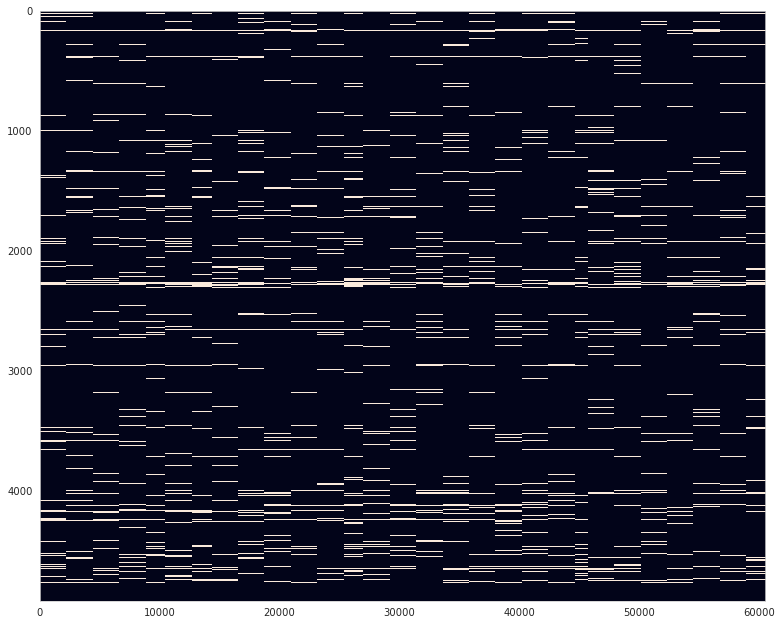

In [30]:
plt.figure(figsize=(13, 30))
plt.imshow(nans, aspect=10)
plt.grid()
plt.show()

In [6]:
mice.setup_preproc_data()

In [7]:
mice.setup_anat_data()

In [ ]:
bad = collections.defaultdict(list)
for key, func in tqdm(mice.bold_preproc.items()):
    m = mice.T1w['_'.join((key.split('_')[:2]))].load_ants()
    m = np.where(m.numpy())
    if func.shape is None:
        bad['missing'].append(key)
        continue
    nans = np.isnan(func[m]).sum(1)
    nans = len(np.where(nans > 0)[0]) / len(nans)
    print(f"key = {key},  proportion of nan ROIs: {nans:.2f}")
    if nans > 0.2:
        bad['NaN'].append(key)

  0%|          | 0/210 [00:00<?, ?it/s]

key = sub-SLC01_ses-1_run-1,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-1_run-2,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-1_run-3,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-1_run-4,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-1_run-5,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-1_run-6,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-1_run-7,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-1,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-2,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-3,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-4,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-5,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-6,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-2_run-7,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-1,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-2,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-3,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-4,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-5,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-6,  proportion of nan ROIs: 0.00

key = sub-SLC01_ses-3_run-7,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-1,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-2,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-3,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-4,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-5,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-6,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-1_run-7,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-1,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-2,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-3,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-4,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-5,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-6,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-2_run-7,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-3_run-1,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-3_run-2,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-3_run-3,  proportion of nan ROIs: 0.00

key = sub-SLC02_ses-3_run-4,  proportion of nan ROIs: 0.00

In [ ]:
bad

In [2]:
N = 600
fs = 10
delta_t = 1 / fs

t_idxs = np.arange(N * fs)
time = t_idxs * delta_t
freqs = sp_fft.rfftfreq(len(t_idxs), 1/fs)

fs, delta_t

(10, 0.1)

In [3]:
frequencies = [2.5, 0.5, 0.2, 0.1]
omegas = [2 * np.pi * f for f in frequencies]

coefs_1 = [0.8, 0.3, 0.1, -0.2]
coefs_2 = [0.8, 0.4, 0.6, 0.1]
x1 = sum(c * np.cos(w * time) for c, w in zip(coefs_1, omegas))
x2 = sum(c * np.cos(w * time) for c, w in zip(coefs_2, omegas))

print(x1.var(), x2.var())

x1 = sp_stats.zscore(x1)
x2 = sp_stats.zscore(x2)

x = np.concatenate([
    np.expand_dims(x1, 0),
    np.expand_dims(x2, 0),
])

rng = get_rng()
x1_noise = x1 + rng.normal(0, 2.0, len(time))
x2_noise = x2 + rng.normal(0, 0.5, len(time))

x_noise = np.concatenate([
    np.expand_dims(x1_noise, 0),
    np.expand_dims(x2_noise, 0),
])

0.38999999999999513 0.584999999999993

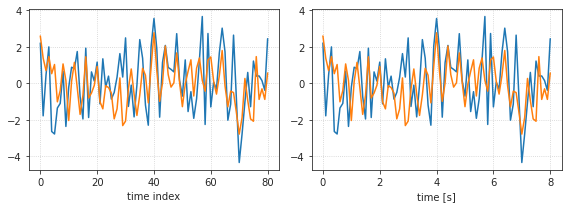

In [4]:
fig, axes = create_figure(1, 2, (8., 3.))
intvl = range(0, 81)

for i, ax in enumerate(axes.flat):
    if i == 0:
        _x = t_idxs[intvl]
        lbl = 'time index'
    else:
        _x = time[intvl]
        lbl = 'time [s]'
    ax.plot(_x, x_noise[0, intvl])
    ax.plot(_x, x_noise[1, intvl])
    ax.set_xlabel(lbl)
    ax.grid()
plt.show()

In [5]:
results = bandpass_corr(x, [(0.01, 1.0), (2.0, 4.0)], fs)
list(results)

['y', 'freqs', 'bands', 'band_freqs', 'corrs']

In [6]:
results['corrs']

array([[[1.        , 0.58737848],
        [0.58737848, 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]]])

In [7]:
get_band_corr(results['y'])

array([[1.        , 0.83743239],
       [0.83743239, 1.        ]])

In [8]:
sp_stats.pearsonr(x1, x2)

(0.8374323906951013, 0.0)

In [9]:
2 * results['y'].real @ results['y'].real.T

array([[1.        , 0.83743239],
       [0.83743239, 1.        ]])

In [22]:
results = bandpass_corr(x_noise, [(0.01, 1.0), (2.0, 4.0)], fs, zscore=False)
results['corrs']

array([[[1.        , 0.32268004],
        [0.32268004, 1.        ]],

       [[1.        , 0.6881506 ],
        [0.6881506 , 1.        ]]])

In [23]:
get_band_corr(results['y'])

array([[1.        , 0.45851159],
       [0.45851159, 1.        ]])

In [24]:
sp_stats.pearsonr(x1_noise, x2_noise)

(0.33396009223651846, 2.9462772690401464e-156)

In [25]:
2 * results['y'].real @ results['y'].real.T

array([[3.05191944, 0.84777185],
       [0.84777185, 1.11982704]])

In [26]:
y_norm = np.linalg.norm(
    x=results['y'].reshape(1, -1),
    ord=2,
    axis=0,
).reshape(results['y'].shape)

results['y'].shape, y_norm.shape

((2, 3001), (2, 3001))

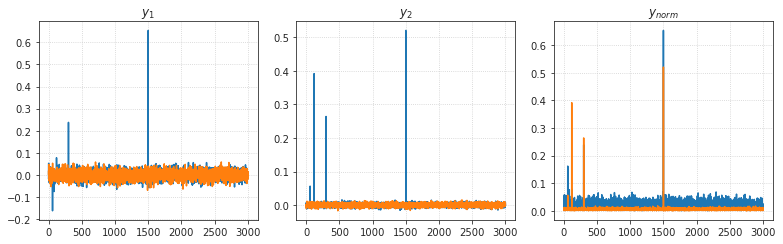

In [23]:
fig, axes = create_figure(1, 3, (11, 3.5))

for i, ax in enumerate(axes.flat):
    ax.grid()
    try:
        ax.plot(results['y'][i].real, label='real')
        ax.plot(results['y'][i].imag, label='imag')
        axes[-1].plot(y_norm[i])
        ax.set_title(f"$y_{i+1}$")
    except IndexError:
        continue
    # ax.legend()

axes[-1].set_title('$y_{norm}$')
# axes[-1].legend()
# axes[-1].grid()

plt.show()

### Spectrogram & Periodogram

In [36]:
x = np.concatenate([np.expand_dims(x1_noise, 0), np.expand_dims(x2_noise, 0)])

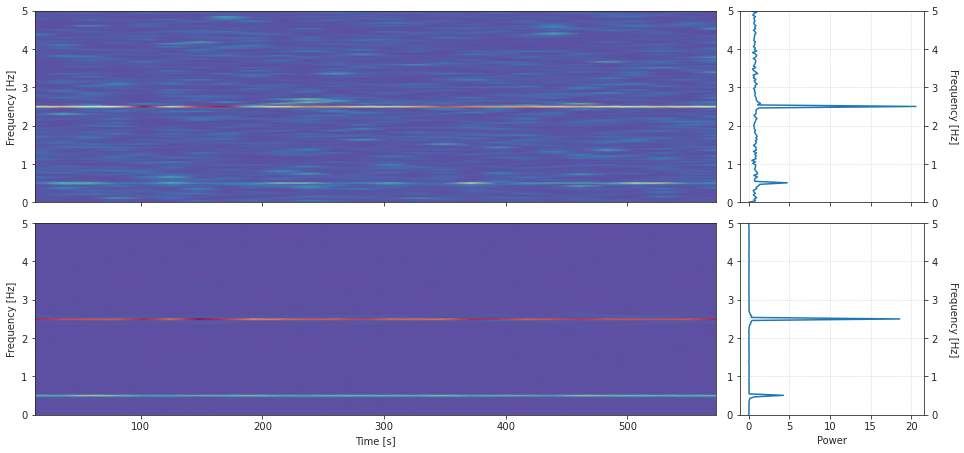

In [37]:
_ = plot_spectrogram(x, fs)

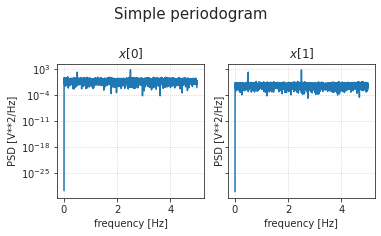

In [38]:
_ = plot_periodogram(x, fs, 'simple')

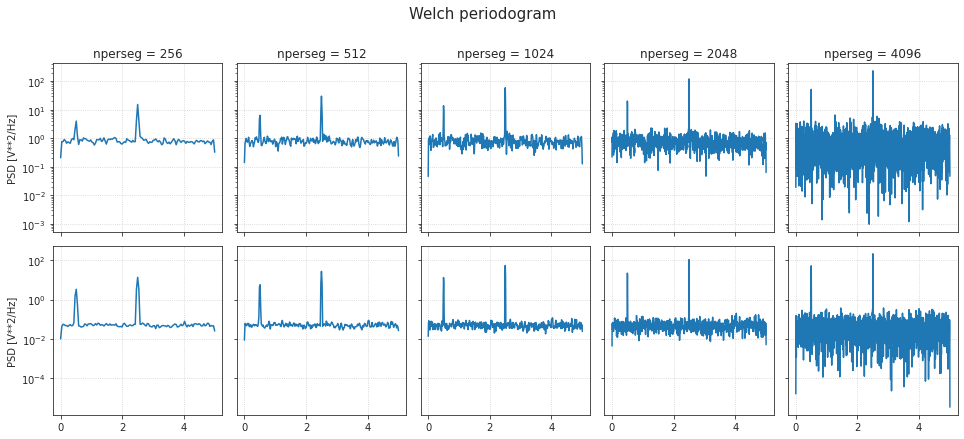

In [39]:
_ = plot_periodogram(x, fs, 'welch', figsize_y=3)

## Bandpass

### Butter response

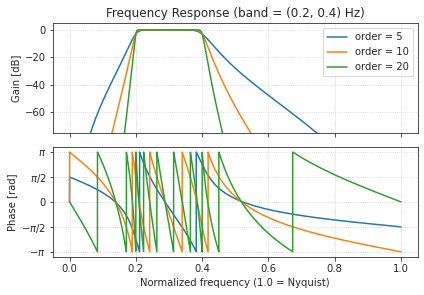

In [40]:
fig, axes = create_figure(2, 1, (6, 4.2), sharex='col')
band = (0.2, 0.4)

axes[0].set(
    ylim=(-75, 5),
    yticks=[0, -20, -40, -60],
    title=f"Frequency Response (band = {band} Hz)",
    ylabel='Gain [dB]',
)
axes[1].set(
    yticks=[-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
    yticklabels=[r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'],
)
axes[1].set_ylabel('Phase [rad]')
axes[1].set_xlabel('Normalized frequency (1.0 = Nyquist)')

for i, order in enumerate([5, 10, 20]):
    sos = sp_sig.butter(
        N=order,
        Wn=band,
        btype='bandpass',
        output='sos',
    )
    w, h = sp_sig.sosfreqz(sos, worN=10000)
    db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
    
    axes[0].plot(w / np.pi, db, label=f"order = {order}")
    axes[1].plot(w / np.pi, np.angle(h))
axes[0].legend()
axes[0].grid()
axes[1].grid()
plt.show()

### Elliptic response

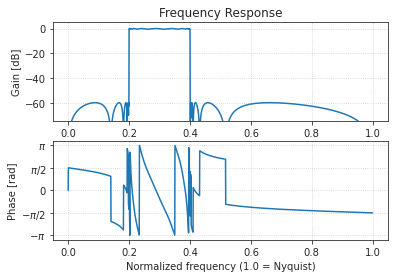

In [41]:
sos = sp_sig.ellip(15, 0.5, 60, (0.2, 0.4), btype='bandpass',
                   output='sos')
w, h = sp_sig.sosfreqz(sos, worN=1500)
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()

### Butter on sim data

In [42]:
N = 600
fs = 10
delta_t = 1 / fs

t_idxs = np.arange(N * fs)
time = t_idxs * delta_t
freqs = sp_fft.rfftfreq(len(t_idxs), 1/fs)

fs, delta_t

(10, 0.1)

In [43]:
f1 = 2.5
f2 = 0.5
omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2

a, b = 0.8, 0.4
x1 = a * np.cos(omega1 * time) - b * np.cos(omega2 * time)
x2 = a * np.cos(omega1 * time) + b * np.cos(omega2 * time)

print(x1.var(), x2.var())

x1 = sp_stats.zscore(x1)
x2 = sp_stats.zscore(x2)

rng = get_rng()
x1_noise = x1 + rng.normal(0, 2.0, len(time))
x2_noise = x2 + rng.normal(0, 0.5, len(time))

0.40000000000000674 0.3999999999999933

In [44]:
x = np.concatenate([
    np.expand_dims(x1_noise, 0),
    np.expand_dims(x2_noise, 0),
])
x.shape

(2, 6000)

In [45]:
order = 5
band = (2, 3)# (0.4, 0.6)# (0.01, 1.0)

x_filt_zi, sos = apply_butter(x, fs, band, order, use_zi=True)
x_filt, sos = apply_butter(x, fs, band, order, use_zi=False)

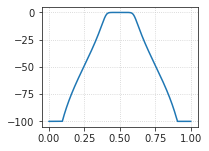

In [46]:
fig, ax = create_figure(1, 1, (3, 2.2))
w, h = sp_sig.sosfreqz(sos, worN=10000, fs=fs)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
ax.plot(2 * w / fs, db)
ax.grid()
plt.show()

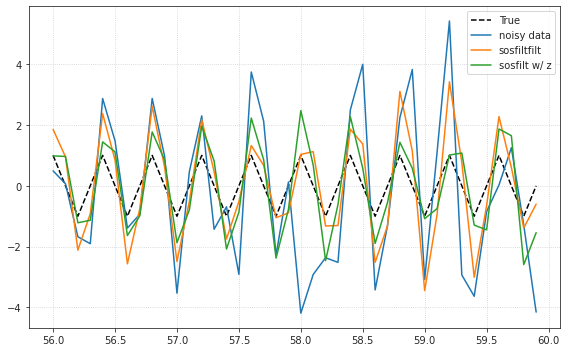

In [47]:
fig, ax = create_figure(1, 1, (8, 5))

intvl = range(560, 600)
ax.plot(time[intvl], np.cos(omega1 * time)[intvl], label='True', color='k', ls='--')
ax.plot(time[intvl], x[0, intvl], label='noisy data')
ax.plot(time[intvl], x_filt[0, intvl], label='sosfiltfilt')
ax.plot(time[intvl], x_filt_zi[0, intvl], label='sosfilt w/ z')
ax.legend()
ax.grid()
plt.show()

In [48]:
sp_stats.pearsonr(x_filt[0], np.cos(omega1 * time))

(0.7202388501776518, 0.0)

In [49]:
sp_stats.pearsonr(x_filt_zi[0], np.cos(omega1 * time))

(0.7037252806356934, 0.0)

In [50]:
sp_stats.pearsonr(x1, x2), sp_stats.pearsonr(x[0], x[1])

((0.5999999999999999, 0.0), (0.23849511294387593, 2.2943326036461635e-78))

In [51]:
sp_stats.pearsonr(x_filt[0], x_filt[1]), sp_stats.pearsonr(x_filt_zi[0], x_filt_zi[1])

((0.6959511924898061, 0.0), (0.6779922237267759, 0.0))

In [52]:
corr = sp_sig.correlate(x_filt[0], np.cos(omega1 * time))
corr_with_z = sp_sig.correlate(x_filt_zi[0], np.cos(omega1 * time))

corr /= np.max(corr)
corr_with_z /= np.max(corr_with_z)

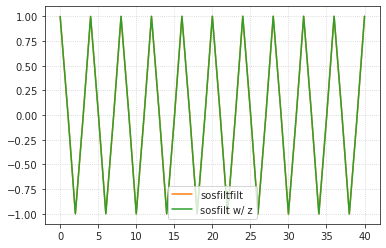

In [53]:
plt.plot(corr[5999 - 20: 5999 + 21], label='sosfiltfilt', color='C1')
plt.plot(corr_with_z[5999 - 20: 5999 + 21], label='sosfilt w/ z', color='C2')
plt.legend()
plt.grid()

In [54]:
np.max(corr), np.max(corr_with_z)

(1.0, 1.0)

[<matplotlib.lines.Line2D object at 0x7facfc287dc0>]

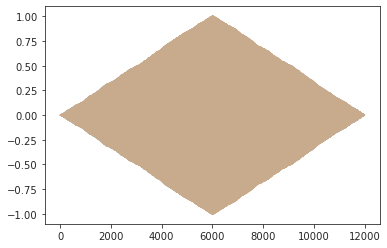

In [55]:
plt.plot(corr, alpha=0.4)
plt.plot(corr_with_z, alpha=0.4)

In [56]:
intvl = range(100)
sig = x1[intvl]
sig_noise = x1_noise[intvl]

corr = sp_sig.correlate(sig_noise, sig)
lags = sp_sig.correlation_lags(len(sig), len(sig_noise))
corr /= np.max(corr)

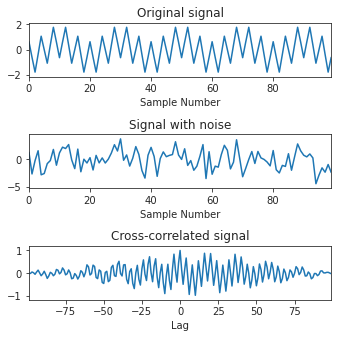

In [57]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

### Spectrogram & Periodogram

In [58]:
x = np.concatenate([
    np.expand_dims(x1_noise, 0),
    np.expand_dims(x2_noise, 0),
])

order = 5
band = (0.01, 1.0)

x_filt_zi, sos = apply_butter(x, fs, band, order, use_zi=True)
x_filt, sos = apply_butter(x, fs, band, order, use_zi=False)

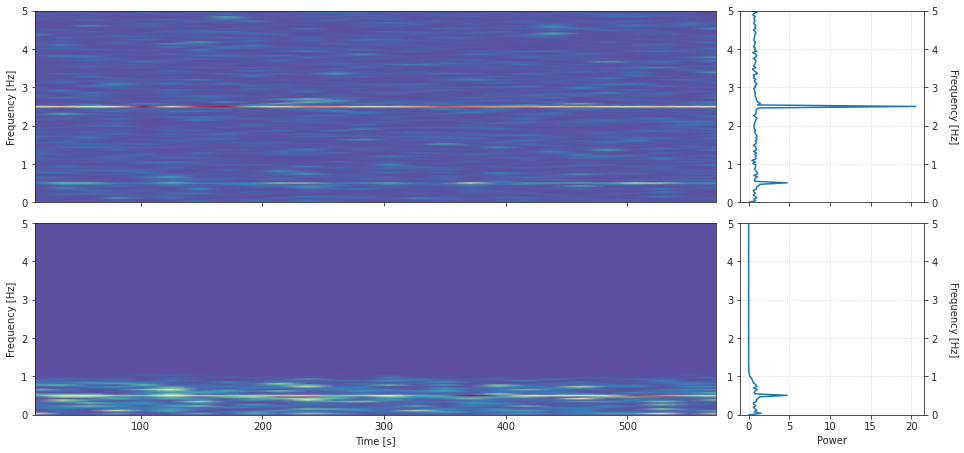

In [59]:
x = np.concatenate([np.expand_dims(x1_noise, 0), np.expand_dims(x_filt[0], 0)])
(f, t, sxx), _ = plot_spectrogram(x, fs)

In [60]:
f.shape, t.shape, sxx.shape

((2, 129), (2, 26), (2, 129, 26))

In [61]:
x = np.concatenate([np.expand_dims(x_filt[0], 0), np.expand_dims(x1_noise, 0)])

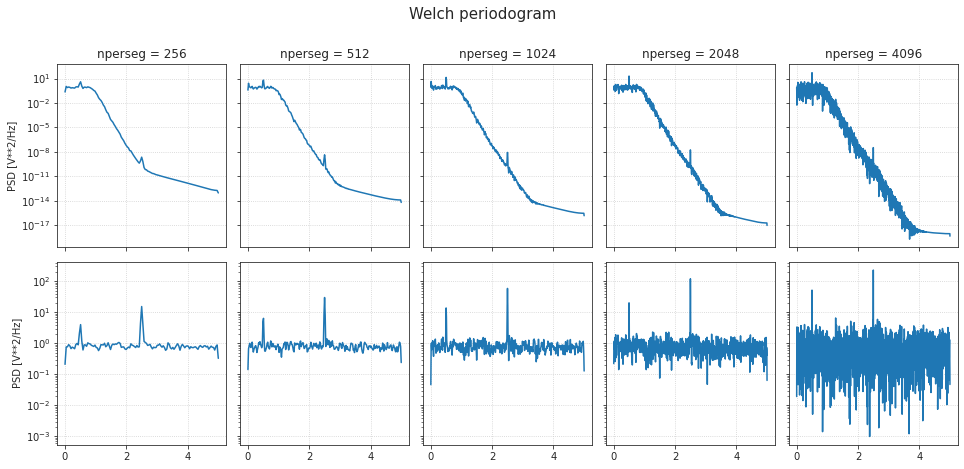

In [62]:
(f, pxx), _ = plot_periodogram(x, fs, kind='welch')

In [63]:
f[256].shape, pxx[256].shape

((2, 129), (2, 129))

In [64]:
for nperseg in pxx:
    peak_freqs = [_f[i] for _f, i in zip(f[nperseg], np.argmax(pxx[nperseg], axis=1))]
    print(f"nperseg = {nperseg},\tpeak freqs: {peak_freqs}")

nperseg = 256,  peak freqs: [0.5078125, 2.5]

nperseg = 512,  peak freqs: [0.5078125, 2.5]

nperseg = 1024, peak freqs: [0.498046875, 2.5]

nperseg = 2048, peak freqs: [0.498046875, 2.5]

nperseg = 4096, peak freqs: [0.50048828125, 2.5]

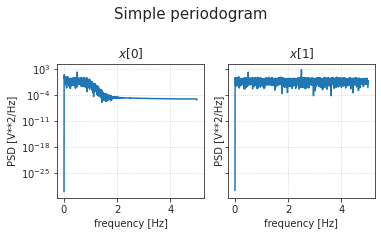

In [65]:
(f, pxx), _ = plot_periodogram(x, fs, kind='simple')

In [66]:
f.shape, pxx.shape

((2, 3001), (2, 3001))

In [67]:
peak_freqs = [_f[i] for _f, i in zip(f, np.argmax(pxx, axis=1))]
peak_freqs

[0.5, 2.5]

## Coherence

In [68]:
f, cxy = sp_sig.coherence(
    x=x1_noise,
    y=x2_noise,
    nperseg=256,
    fs=fs,
)

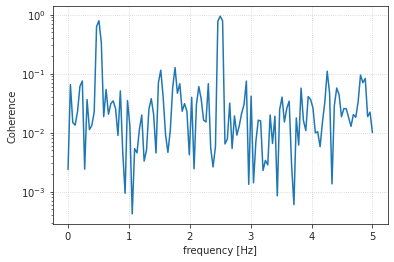

In [69]:
plt.semilogy(f, cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.grid()
plt.show()

<AxesSubplot:ylabel='Count'>

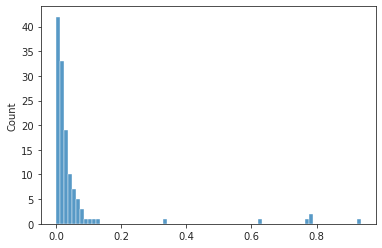

In [70]:
sns.histplot(cxy)

In [71]:
idxs = np.argsort(cxy)[::-1][:10]
idxs

array([ 64,  13,  65,  63,  12,  14,  45,  39, 109, 123])

In [72]:
cxy[idxs]

array([0.93513394, 0.78576451, 0.78408372, 0.77134926, 0.62511697,
       0.33162038, 0.12648448, 0.11405977, 0.10954069, 0.09434894])

In [73]:
f[idxs]

array([2.5      , 0.5078125, 2.5390625, 2.4609375, 0.46875  , 0.546875 ,
       1.7578125, 1.5234375, 4.2578125, 4.8046875])